In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

from rlforge.agents import SarsaAgent, QAgent, ExpectedSarsaAgent
from rlforge.experiments import runEpisodicExperiment

In [2]:
env = gym.make("CliffWalking-v0")
sarsa_agent = SarsaAgent(step_size=0.5,
                         discount=1,
                         num_states=env.observation_space.n,
                         num_actions=env.action_space.n,
                         epsilon=0.1)
q_agent = QAgent(step_size=0.5,
                 discount=1,
                 num_states=env.observation_space.n,
                 num_actions=env.action_space.n,
                 epsilon=0.1)
expected_sarsa_agent = ExpectedSarsaAgent(step_size=0.5,
                                          discount=1,
                                          num_states=env.observation_space.n,
                                          num_actions=env.action_space.n,
                                          epsilon=0.1)

In [3]:
algorithms = ["SARSA", "Q Learning", "Expected SARSA"]
agents = [sarsa_agent, q_agent, expected_sarsa_agent]

rewards_list = []
steps_per_episode_list = []

for agent in agents:

    rewards, steps_per_episode = runEpisodicExperiment(env, agent, 100, 500, 10000)

    rewards_list.append(rewards)
    steps_per_episode_list.append(steps_per_episode)

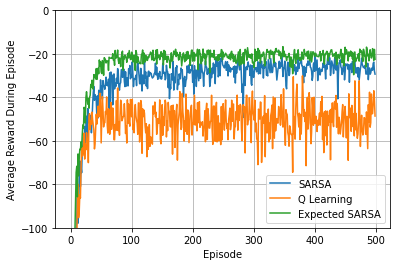

In [4]:
for idx, algo_rewards in enumerate(rewards_list):

  plt.plot(np.mean(algo_rewards, axis=1), label = algorithms[idx])

plt.xlabel("Episode")
plt.ylabel("Average Reward During Episode")
plt.ylim(-100,0)
plt.legend()
plt.grid()

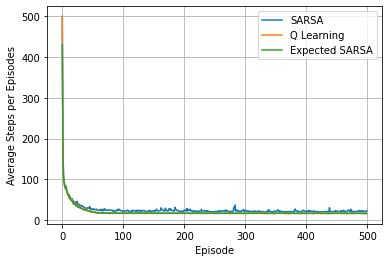

In [5]:
for idx, algo_steps in enumerate(steps_per_episode_list):

  plt.plot(np.mean(algo_steps, axis=1), label = algorithms[idx])

plt.xlabel("Episode")
plt.ylabel("Average Steps per Episodes")
plt.legend()
plt.grid()